In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.2 MB/s eta 0:00:00


In [6]:
!unzip /content/elon_musk_tweets.csv.zip

Archive:  /content/elon_musk_tweets.csv.zip
  inflating: elon_musk_tweets.csv    


In [4]:
from transformers import pipeline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [7]:
df = pd.read_csv('/content/elon_musk_tweets.csv')

In [8]:
df.drop('user_created', axis = 1, inplace = True)

In [9]:
df.head(5)

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [10]:
df.shape

(5780, 15)

In [11]:
df['user_location'].isnull().sum()

4730

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5780 non-null   int64 
 1   user_name         5780 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1422 non-null   object
 4   user_followers    5780 non-null   int64 
 5   user_friends      5780 non-null   int64 
 6   user_favourites   5780 non-null   int64 
 7   user_verified     5780 non-null   bool  
 8   date              5780 non-null   object
 9   text              5780 non-null   object
 10  hashtags          2 non-null      object
 11  source            5780 non-null   object
 12  retweets          5780 non-null   int64 
 13  favorites         5780 non-null   int64 
 14  is_retweet        5780 non-null   bool  
dtypes: bool(2), int64(6), object(7)
memory usage: 598.4+ KB


In [13]:
df['user_verified'].value_counts()

True     4067
False    1713
Name: user_verified, dtype: int64

# Create date, hours and years columns


In [14]:

df['date'] = pd.to_datetime(df['date'])

In [15]:
df['hours'] = df['date'].dt.hour

In [16]:
df['year'] = df['date'].dt.year

In [17]:
df['year'].value_counts()

2023    3253
2022    2527
Name: year, dtype: int64

<Axes: xlabel='hours', ylabel='Count'>

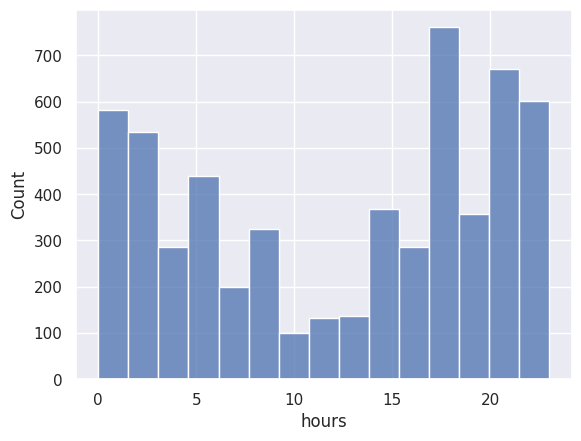

In [19]:
sns.histplot(df.hours)

Thời gian tweet nhiều nhất của Elon trong khoảng chiều tối (15 - 20 h)

In [21]:
# Extract the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Count the occurrences of each day of the week
day_counts = df['day_of_week'].value_counts()

In [22]:
a = {} 
for day in df['day_of_week'].unique():
    a[day] = (df['day_of_week'] == day).sum()

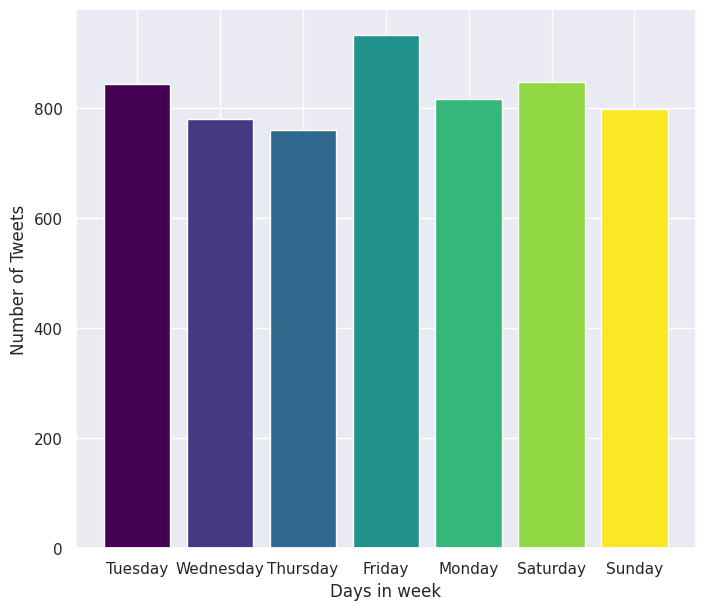

In [31]:
plt.figure(figsize = (8,7))
colors = plt.cm.viridis(np.linspace(0, 1, len(day_counts)))
plt.bar( list(a.keys()),list(a.values()),  color=colors)
plt.xlabel('Days in week')
plt.ylabel('Number of Tweets')
plt.show()

Các ngày trong tuần, ông đều Tweet tương đối đều đặn khoảng > 800 Tweet mỗi tuần => 114 Tweet mỗi ngày

In [30]:
import matplotlib
print(matplotlib.__version__)

3.7.1


Text(0.5, 1.0, 'Number of Entries by Hour of the Day')

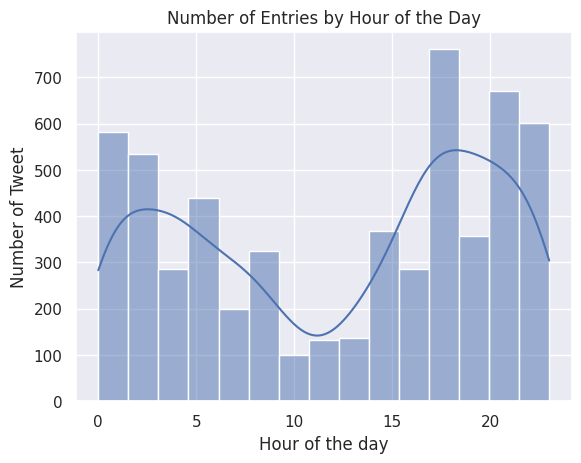

In [32]:
sns.histplot(df['hours'], kde = True)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Tweet')
plt.title('Number of Entries by Hour of the Day')

In [33]:
df.head(5)

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hours,year,day_of_week
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False,17,2022,Tuesday
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False,17,2022,Tuesday
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False,17,2022,Tuesday
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False,17,2022,Tuesday
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False,17,2022,Tuesday


In [34]:
from transformers import pipeline

In [35]:
sentiment_analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [36]:
sentiment_analysis('We are very happy to introduce pipeline to the transformers repository.')

[{'label': 'POSITIVE', 'score': 0.9996980428695679}]

Save to a csv file

In [75]:
df.to_csv('/content/elon_musk_tweets_withsentiment.csv')

In [37]:
df.head(5)

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hours,year,day_of_week
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False,17,2022,Tuesday
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False,17,2022,Tuesday
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False,17,2022,Tuesday
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False,17,2022,Tuesday
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False,17,2022,Tuesday


# This code i used Transformer model to detect, which is positive or negative tweet of him

In [39]:
import pandas as pd
from transformers import pipeline

# Load the pre-trained sentiment analysis model
model = pipeline('sentiment-analysis')

# Apply the sentiment analysis model to the text column
results = model(df['text'].tolist())

# Create new columns for the sentiment predictions and scores
df['sentiment'] = [result['label'] for result in results]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [40]:
df.head()

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hours,year,day_of_week,sentiment
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False,17,2022,Tuesday,NEGATIVE
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False,17,2022,Tuesday,NEGATIVE
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False,17,2022,Tuesday,POSITIVE
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False,17,2022,Tuesday,POSITIVE
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False,17,2022,Tuesday,POSITIVE


In [ ]:
(df[df['day_of_week'] == day]['sentiment'] == 'POSITIVE').sum()

In [51]:
week_neg_pos = {}
for day in df['day_of_week'].unique():
  week_neg_pos[day] = (df['day_of_week'] == day).sum()

<Axes: xlabel='day_of_week', ylabel='count'>

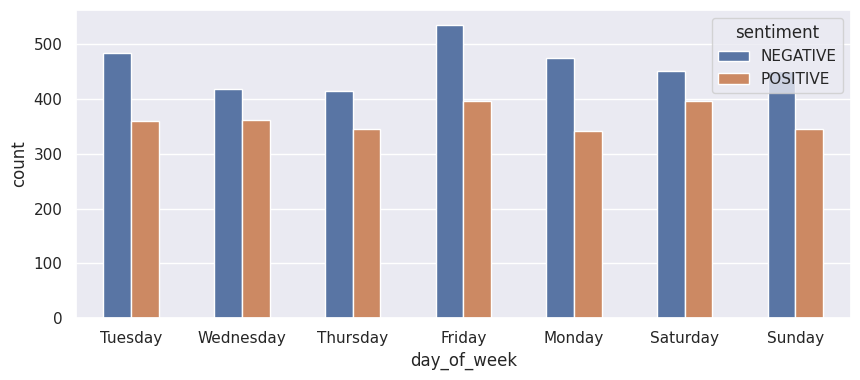

In [69]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = 'day_of_week', width = .5, hue = 'sentiment')

<Axes: xlabel='hours', ylabel='count'>

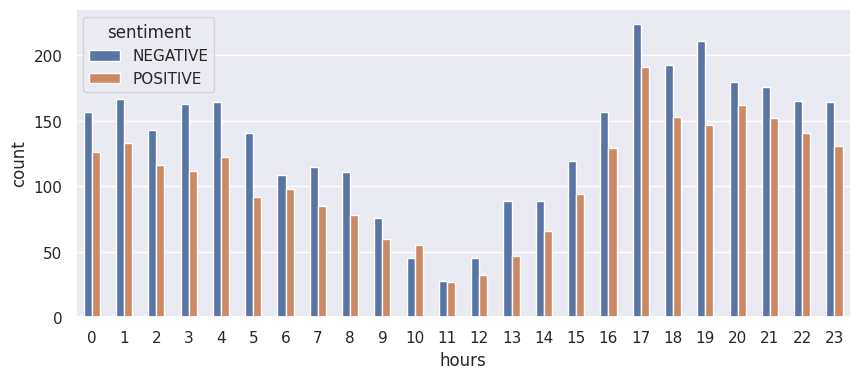

In [70]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = 'hours', width = .5, hue = 'sentiment')

Hầu như Tweet tích cực hơn tiêu cực 

In [71]:
!pip install wordcloud

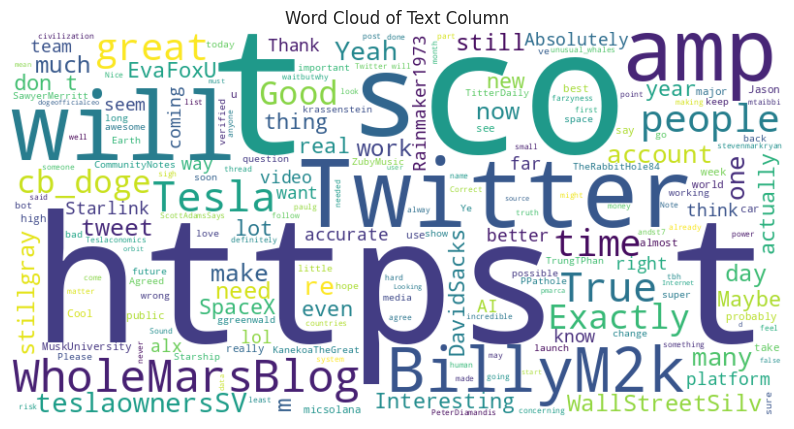

In [73]:
from wordcloud import WordCloud
text_column = df['text']

# Concatenate all the text into a single string
text = ' '.join(text_column)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear',cmap='viridis')
plt.axis('off')
plt.title('Word Cloud of Text Column')
plt.show()